In [1]:
%matplotlib inline
import pandas as pd
import nupis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gp
import pysal as ps
import pysal.contrib.viz.mapping as maps
import palettable

pd.options.mode.chained_assignment = None

sns.set(style='whitegrid', palette='bright', context='notebook')

## Parte 1 - microrregião de Varginha

In [2]:
atlas = pd.read_csv('atlas.csv')     # carregar o atlas
vga = atlas.query('nome_micro == "Varginha"')   # selecionar apenas municípios de Varginha

In [3]:
vga.head()

,nome_mun,nome_uf,mun,uf,rm,meso,nome_meso,micro,nome_micro,espvida,...,popul,porte,vab_agro,vab_ind,vab_serv,vab_adm,vab_total,impostos,pib,pibpc
2318,Boa Esperança,Minas Gerais,3107109,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,76.28,...,38314,pequenoII,66638.144,34577.949,202936.000,87615.143,391767.237,35979.845,427747.081,11107.72
2360,Campanha,Minas Gerais,3110905,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,75.93,...,15304,pequenoI,21935.040,21600.021,73391.464,35010.201,151936.726,12646.366,164583.091,10662.98
2365,Campo do Meio,Minas Gerais,3111309,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,74.61,...,11382,pequenoI,19096.391,4110.193,25632.234,26784.899,75623.717,2841.413,78465.129,6812.39
2368,Campos Gerais,Minas Gerais,3111606,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,74.27,...,27443,pequenoII,76574.691,28866.663,103619.538,58535.161,267596.053,15021.429,282617.482,10231.24
2393,Carmo da Cachoeira,Minas Gerais,3113909,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,73.03,...,11673,pequenoI,38907.781,6297.768,38941.770,27031.671,111178.990,5659.219,116838.210,9871.43


In [4]:
nupis.simplificar_nomes(vga, 'nome_mun')   # tirar acentos dos nomes dos municípios
vga

,nome_mun,nome_uf,mun,uf,rm,meso,nome_meso,micro,nome_micro,espvida,...,popul,porte,vab_agro,vab_ind,vab_serv,vab_adm,vab_total,impostos,pib,pibpc
2318,boa_esperanca,Minas Gerais,3107109,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,76.28,...,38314,pequenoII,66638.144,34577.949,202936.000,87615.143,391767.237,35979.845,427747.081,11107.72
2360,campanha,Minas Gerais,3110905,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,75.93,...,15304,pequenoI,21935.040,21600.021,73391.464,35010.201,151936.726,12646.366,164583.091,10662.98
2365,campo_do_meio,Minas Gerais,3111309,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,74.61,...,11382,pequenoI,19096.391,4110.193,25632.234,26784.899,75623.717,2841.413,78465.129,6812.39
2368,campos_gerais,Minas Gerais,3111606,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,74.27,...,27443,pequenoII,76574.691,28866.663,103619.538,58535.161,267596.053,15021.429,282617.482,10231.24
2393,carmo_da_cachoeira,Minas Gerais,3113909,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,73.03,...,11673,pequenoI,38907.781,6297.768,38941.770,27031.671,111178.990,5659.219,116838.210,9871.43
2448,coqueiral,Minas Gerais,3118700,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,75.26,...,9258,pequenoI,27005.445,3696.207,25487.685,21361.026,77550.363,3133.274,80683.637,8687.80
2506,eloi_mendes,Minas Gerais,3123601,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,75.26,...,25125,pequenoII,46459.333,38018.728,136999.812,55356.360,276834.232,35839.256,312673.488,12375.27
2561,guape,Minas Gerais,3128105,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,74.86,...,13798,pequenoI,27917.457,4822.892,35312.114,31749.265,99801.728,5229.930,105031.658,7590.09
2588,ilicinea,Minas Gerais,3130507,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,74.61,...,11437,pequenoI,24658.491,13761.332,32589.435,25736.683,96745.941,4343.987,101089.927,8799.61
2734,monsenhor_paulo,Minas Gerais,3142601,31,nao,3110,Sul/Sudoeste de Minas,31050,Varginha,75.32,...,8124,pequenoI,15702.638,40774.684,29587.034,17326.218,103390.574,11778.578,115169.152,14100.04


In [5]:
mapa = gp.read_file('ssm.shp')
mapa = pd.merge(mapa, vga, on='mun')

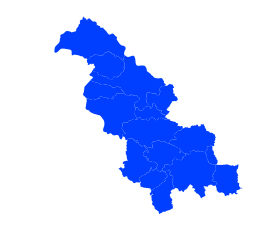

In [13]:
mapa.plot().set_axis_off();

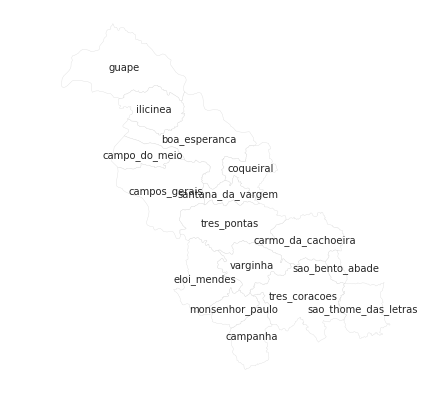

In [14]:
ax = mapa.plot(color='white', edgecolor='lightgray', figsize=(7,7))

for i in mapa.index:
    plt.text(mapa.geometry.centroid[i].coords[0][0], mapa.geometry.centroid[i].coords[0][1], mapa.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='center')

ax.set_axis_off();

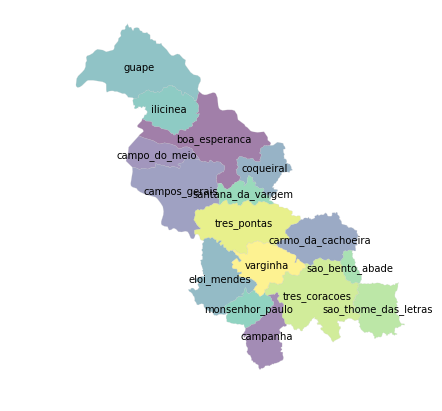

In [15]:
ax = mapa.plot(cmap='viridis', edgecolor='lightgray', linewidth=0.4, alpha=.5, figsize=(7,7))

fontdict = dict(color='black', size=10)

for i in mapa.index:
    plt.text(mapa.geometry.centroid[i].coords[0][0], mapa.geometry.centroid[i].coords[0][1], mapa.nome_mun[i],
             fontdict=fontdict, horizontalalignment='center', verticalalignment='center')

plt.axis('equal')    
ax.set_axis_off();

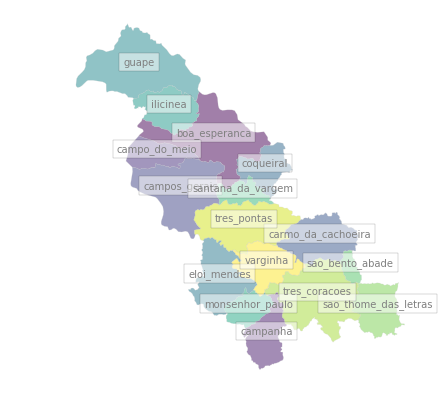

In [16]:
ax = mapa.plot(cmap='viridis', edgecolor='lightgray', linewidth=0.4, alpha=.5, figsize=(7,7))

fontdict = dict(color='gray', size=10)
bboxdict = dict(facecolor='white', alpha=0.5)

for i in mapa.index:
    plt.text(mapa.geometry.centroid[i].coords[0][0], mapa.geometry.centroid[i].coords[0][1], mapa.nome_mun[i],
             horizontalalignment ='center', verticalalignment='bottom', fontdict=fontdict, bbox=bboxdict)

plt.axis('equal')    
ax.set_axis_off();

In [17]:
mapa.nome_mun

0            boa_esperanca
1                 campanha
2            campo_do_meio
3            campos_gerais
4       carmo_da_cachoeira
5                coqueiral
6              eloi_mendes
7                    guape
8                 ilicinea
9          monsenhor_paulo
10       santana_da_vargem
11         sao_bento_abade
12    sao_thome_das_letras
13           tres_coracoes
14             tres_pontas
15                varginha
Name: nome_mun, dtype: object

In [18]:
# escolhendo algumas cidades manualmente
cidades_escolhidas = mapa.query('nome_mun == ["varginha", "tres_pontas", "tres_coracoes"]')

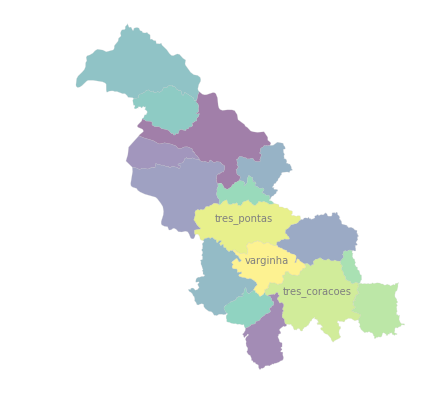

In [19]:
ax = mapa.plot(cmap='viridis', edgecolor='lightgray', linewidth=0.4, alpha=.5, figsize=(7,7))

fontdict = dict(color='gray', size=10)

for i in cidades_escolhidas.index:
    plt.text(cidades_escolhidas.geometry.centroid[i].coords[0][0], cidades_escolhidas.geometry.centroid[i].coords[0][1],
             cidades_escolhidas.nome_mun[i],
             fontdict=fontdict, horizontalalignment='center', verticalalignment='bottom')

plt.axis('equal')    
ax.set_axis_off();

**Estado de MG**

In [20]:
mg = nupis.mesclar_shp_df('31MUE250GC_SIR.shp', 'atlas.csv')

In [21]:
# padronizar os nomes dos municípios
nupis.simplificar_nomes(df=mg, variavel='nome_mun')

In [22]:
mg.head()

,NM_MUNICIP,mun,geometry,nome_mun,nome_uf,uf,rm,meso,nome_meso,micro,...,popul,porte,vab_agro,vab_ind,vab_serv,vab_adm,vab_total,impostos,pib,pibpc
0,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.429672447 -18.16543081755956, -4...",abadia_dos_dourados,Minas Gerais,31,nao,3105,Triângulo Mineiro/Alto Paranaíba,31019,...,6658,pequenoI,20586.812,5826.007,16947.789,16845.053,60205.660,3466.555,63672.215,9497.65
1,ABAETÉ,3100203,POLYGON ((-45.13929899999993 -19.2104779965868...,abaete,Minas Gerais,31,nao,3106,Central Mineira,31024,...,22456,pequenoII,31883.493,30690.289,94263.611,51349.295,208186.688,18137.955,226324.643,9970.25
2,ABRE CAMPO,3100302,"POLYGON ((-42.310709 -20.14278899661063, -42.3...",abre_campo,Minas Gerais,31,nao,3112,Zona da Mata,31061,...,13114,pequenoI,20715.496,14454.303,37438.158,27633.442,100241.398,6572.572,106813.970,8024.49
3,ACAIACA,3100401,POLYGON ((-43.02386900000001 -20.4102179966172...,acaiaca,Minas Gerais,31,nao,3112,Zona da Mata,31060,...,3919,pequenoI,2822.003,1269.090,6979.788,10542.273,21613.153,827.074,22440.227,5718.71
4,AÇUCENA,3100500,POLYGON ((-42.36208300000006 -18.9256939975794...,acucena,Minas Gerais,31,RM Vale do Aço,3108,Vale do Rio Doce,31039,...,10218,pequenoI,7558.957,1777.258,13204.355,23655.129,46195.698,2770.607,48966.306,4754.93


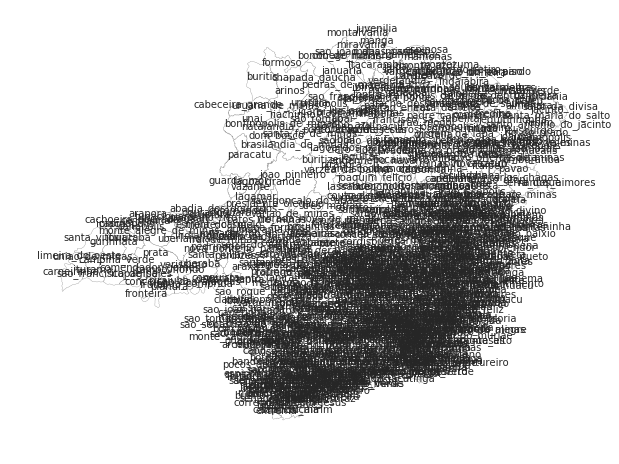

In [13]:
# plotar os nomes de todos os municípios
ax = mg.plot(figsize=(10, 10), color='white', linewidth=.3, edgecolor='gray')
ax.set_axis_off()
for i in mg.index:
    plt.text(mg.geometry.centroid[i].coords[0][0], mg.geometry.centroid[i].coords[0][1], mg.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

In [32]:
# escolhendo algumas cidades manualmente
cidades_escolhidas = mg.query('nome_mun == ["belo_horizonte", "varginha", "uberaba"]')
cidades_escolhidas

,NM_MUNICIP,mun,geometry,nome_mun,nome_uf,uf,rm,meso,nome_meso,micro,...,popul,porte,vab_agro,vab_ind,vab_serv,vab_adm,vab_total,impostos,pib,pibpc
65,BELO HORIZONTE,3106200,POLYGON ((-43.94607618500001 -19.7772410846014...,belo_horizonte,Minas Gerais,31,RM Belo Horizonte,3107,Metropolitana de Belo Horizonte,31030,...,2356435,grandeII,833.082,1.043826e+07,3.342716e+07,6068672.879,4.993492e+07,9268152.152,5.920307e+07,24922.95
821,UBERABA,3170107,POLYGON ((-47.85263799999996 -19.0938939965838...,uberaba,Minas Gerais,31,nao,3105,Triângulo Mineiro/Alto Paranaíba,31022,...,292644,medioII,404486.169,2.308699e+06,3.038971e+06,664528.624,6.416685e+06,883034.971,7.299720e+06,24661.21
832,VARGINHA,3170701,POLYGON ((-45.36476400000004 -21.4811769966435...,varginha,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,31050,...,122584,medioII,29098.854,6.849078e+05,1.684070e+06,289883.051,2.687959e+06,546185.995,3.234145e+06,26268.24


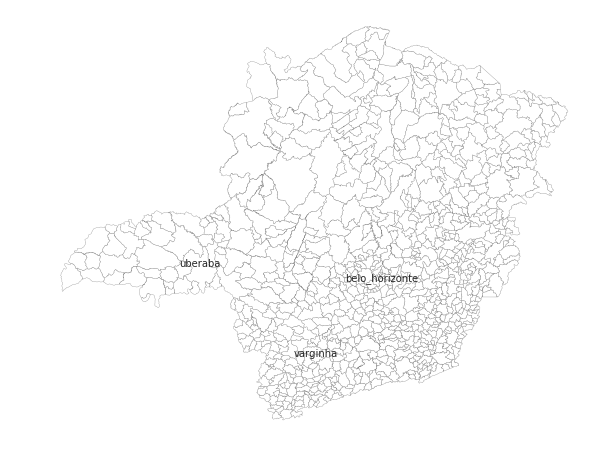

In [33]:
ax = mg.plot(figsize=(10, 10), color='white', linewidth=.3, edgecolor='gray')
ax.set_axis_off()
for i in cidades_escolhidas.index:
    plt.text(cidades_escolhidas.geometry.centroid[i].coords[0][0], cidades_escolhidas.geometry.centroid[i].coords[0][1], 
             cidades_escolhidas.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

In [34]:
# pesquisa: municípios com mais de 200 mil habitantes
cidades_escolhidas = mg.query('popul >= 200000')
cidades_escolhidas.nome_mun.values

array(['belo_horizonte', 'betim', 'contagem', 'divinopolis',
       'governador_valadares', 'ipatinga', 'juiz_de_fora', 'montes_claros',
       'ribeirao_das_neves', 'santa_luzia', 'sete_lagoas', 'uberaba',
       'uberlandia'], dtype=object)

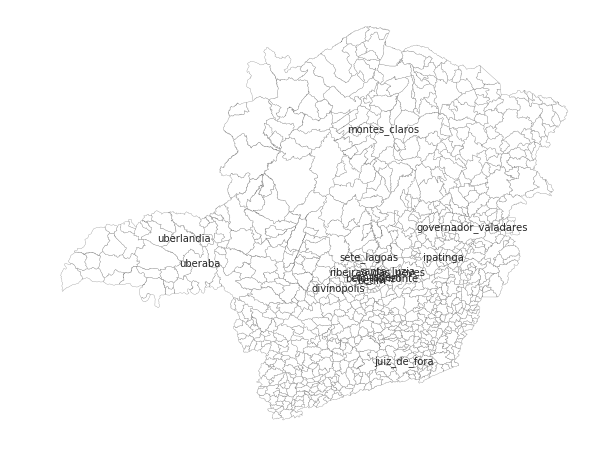

In [35]:
ax = mg.plot(figsize=(10, 10), color='white', linewidth=.3, edgecolor='gray')
ax.set_axis_off()
for i in cidades_escolhidas.index:
    plt.text(cidades_escolhidas.geometry.centroid[i].coords[0][0], cidades_escolhidas.geometry.centroid[i].coords[0][1], 
             cidades_escolhidas.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

In [36]:
# escolhendo algumas cidades com critérios mais específicos
# aquelas com as 5 maiores rendas dos ocupados
x = mg.renocup.sort_values(ascending=True).iloc[:5, ].index.values
pos = mg.loc[x, ['nome_mun']]
cidades_escolhidas = mg.iloc[pos.index, :]
cidades_escolhidas

,NM_MUNICIP,mun,geometry,nome_mun,nome_uf,uf,rm,meso,nome_meso,micro,...,popul,porte,vab_agro,vab_ind,vab_serv,vab_adm,vab_total,impostos,pib,pibpc
667,SANTA CRUZ DE SALINAS,3157377,POLYGON ((-41.61949600000001 -15.9368009974987...,santa_cruz_de_salinas,Minas Gerais,31,nao,3102,Norte de Minas,31005,...,4385,pequenoI,2032.858,1664.103,6210.859,11414.270,21322.090,1167.949,22490.040,5114.86
87,BONITO DE MINAS,3108255,POLYGON ((-44.74137641399991 -14.4670752714569...,bonito_de_minas,Minas Gerais,31,nao,3102,Norte de Minas,31003,...,9639,pequenoI,3486.946,1152.164,7719.249,20511.495,32869.854,1108.208,33978.062,3513.40
546,PALMÓPOLIS,3146750,POLYGON ((-40.31315552299996 -16.6786480555192...,palmopolis,Minas Gerais,31,nao,3103,Jequitinhonha,31014,...,6915,pequenoI,3898.592,1135.361,5532.507,14097.199,24663.659,535.189,25198.848,3638.82
195,CÔNEGO MARINHO,3117836,POLYGON ((-44.52829599999998 -14.7033989974638...,conego_marinho,Minas Gerais,31,nao,3102,Norte de Minas,31003,...,7101,pequenoI,4321.077,1192.975,6371.191,16666.167,28551.410,815.515,29366.925,4142.60
451,MAMONAS,3139250,POLYGON ((-42.90363099999996 -15.0399889974734...,mamonas,Minas Gerais,31,nao,3102,Norte de Minas,31004,...,6300,pequenoI,2608.037,678.526,5222.639,13783.717,22292.920,702.064,22994.983,3637.87


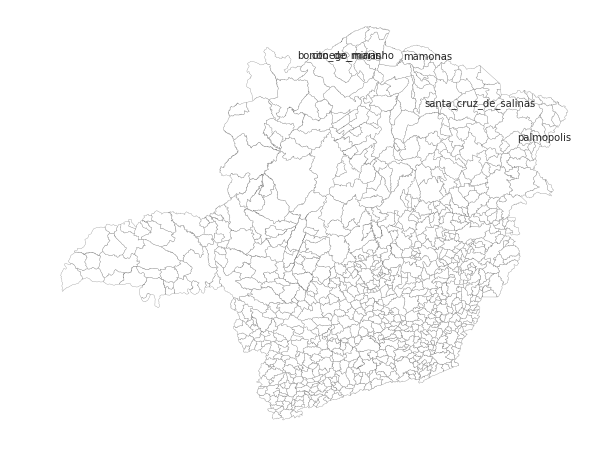

In [19]:
ax = mg.plot(figsize=(10, 10), color='white', linewidth=.3, edgecolor='gray')
ax.set_axis_off()
for i in cidades_escolhidas.index:
    plt.text(cidades_escolhidas.geometry.centroid[i].coords[0][0], cidades_escolhidas.geometry.centroid[i].coords[0][1], 
             cidades_escolhidas.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

**Tarefas para MG**

- escolher municípios por outro critério e plotar os municípios que atendem a ele

In [23]:
# selecionar municípios por outro critério


## Parte 2  - sul de MG

In [24]:
# como criar shapefiles para subseleções
# microrregião alfenas
# alf = ssm.query('nome_micro == "alfenas"')
# alf.shape
# alf.to_file('alf.shp')
# a = gp.read_file('alf.shp') # só testando
# a.plot();                   # só testando

In [25]:
ssm = nupis.mesclar_shp_df(shp='ssm.shp', df='atlas.csv')  # juntar shapefile com dataframe

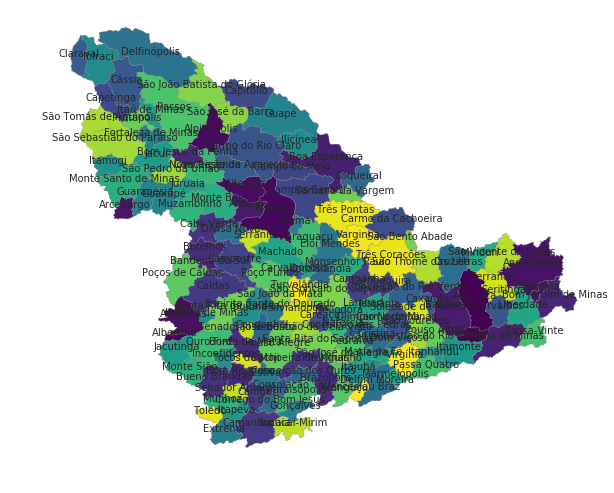

In [26]:
# mapa do sul de MG com nomes dos municípios
ax= ssm.plot(cmap='viridis', edgecolor='gray', linewidth=0.3, figsize=(10,10))

for i in ssm.index:

    plt.text(ssm.geometry.centroid[i].coords[0][0], ssm.geometry.centroid[i].coords[0][1], ssm.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

ax.set_axis_off();    

Escolher uma microrregião do sul de MG e apresentar o mapa com:

- os nomes dos municípios
- algum esquema de cores

In [27]:
# microrregiões do sul de MG
ssm.nome_micro.unique()

array(['Andrelândia', 'São Lourenço', 'Poços de Caldas', 'Alfenas',
       'Passos', 'São Sebastião do Paraíso', 'Varginha', 'Pouso Alegre',
       'Itajubá', 'Santa Rita do Sapucaí'], dtype=object)

**Microrregião escolhida: Alfenas**

In [28]:
mapa = ssm.query('nome_micro == "Alfenas"')

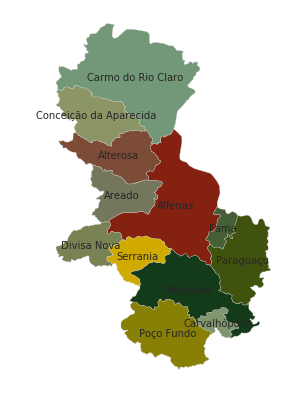

In [29]:
x = palettable.wesanderson.Cavalcanti_5_r.mpl_colormap
# x = palettable.wesanderson.Aquatic1_5.mpl_colormap

ax = mapa.plot(cmap=x, edgecolor='lightgray', figsize=(7,7))

for i in mapa.index:
    plt.text(mapa.geometry.centroid[i].coords[0][0], mapa.geometry.centroid[i].coords[0][1], mapa.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='center')

ax.set_axis_off();

**Análise espacial do Sul/Sudoeste de MG - LISA**

Variável escolhida: renda dos ocupados (*renocup*)

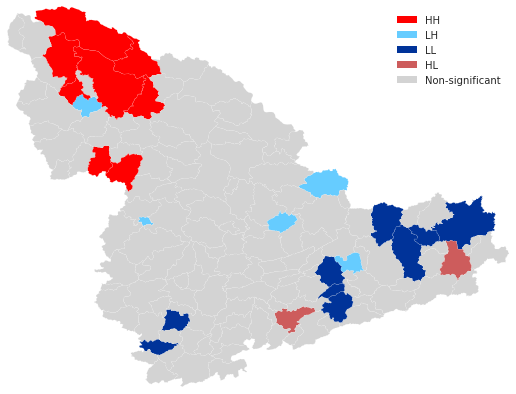

In [31]:
nupis.lisa_mapa(ssm.renocup, 'ssm.shp')

## Criar essas definições separadamente

In [32]:
shapefile = 'ssm.shp'
w = ps.queen_from_shapefile(shapefile)
lisa = ps.Moran_Local(ssm.renocup, w)
p_thres = 0.05

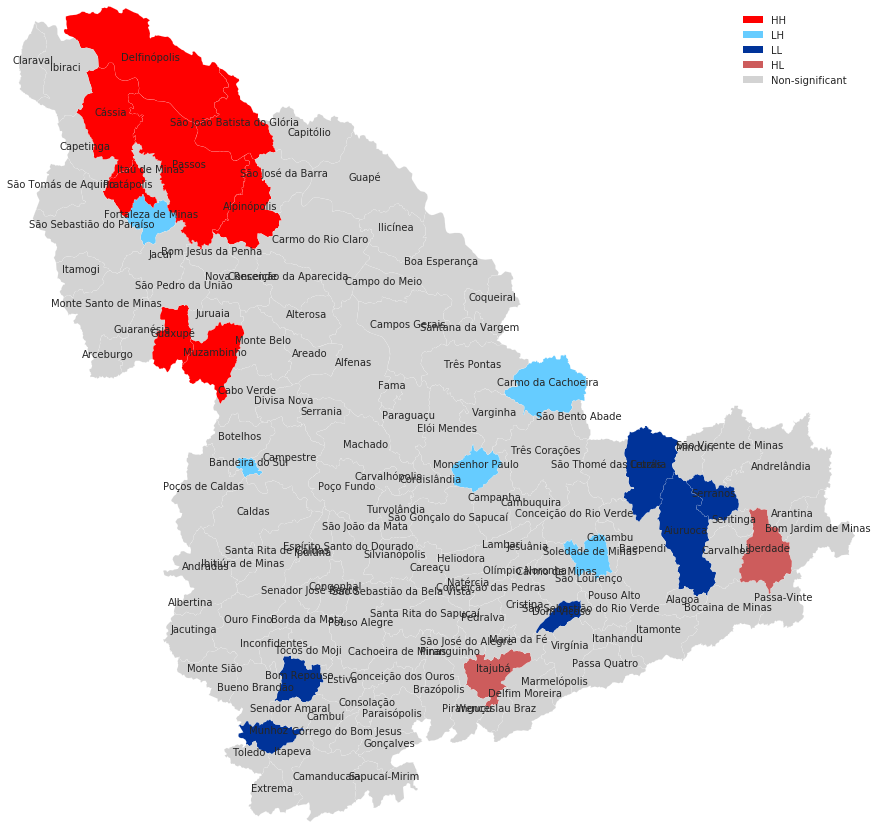

In [33]:
# LISA mostrando os nomes de todos os municípios do sul de MG
fig = plt.figure(figsize=(15, 15))
shp = ps.open(shapefile)
base = maps.map_poly_shp(shp)
base = maps.base_lisa_cluster(base, lisa, p_thres=p_thres)
base.set_edgecolor('1')
base.set_linewidth(0.1)
ax = maps.setup_ax([base], [shp.bbox])

boxes, labels = maps.lisa_legend_components(lisa, p_thres=p_thres)
plt.legend(boxes, labels, fancybox=True)

for i in ssm.index:

    plt.text(ssm.geometry.centroid[i].coords[0][0], ssm.geometry.centroid[i].coords[0][1], ssm.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

In [34]:
# escolhendo algumas cidades manualmente
cidades_escolhidas = ssm.query('nome_mun == ["Varginha", "Caxambu", "Machado"]')

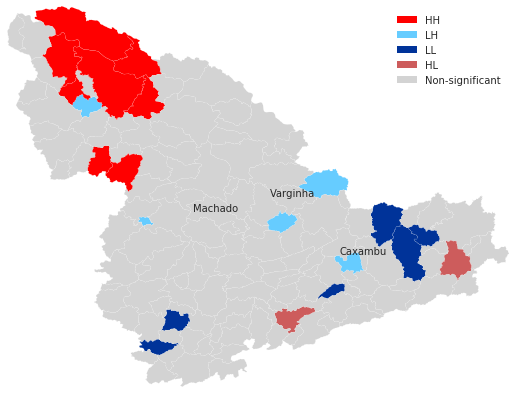

In [35]:
# plotar o mapa LISA com as cidades escolhidas 
fig = plt.figure(figsize=(9, 7))
shp = ps.open(shapefile)
base = maps.map_poly_shp(shp)
base = maps.base_lisa_cluster(base, lisa, p_thres=p_thres)
base.set_edgecolor('1')
base.set_linewidth(0.1)
ax = maps.setup_ax([base], [shp.bbox])

boxes, labels = maps.lisa_legend_components(lisa, p_thres=p_thres)
plt.legend(boxes, labels, fancybox=True)

for i in cidades_escolhidas.index:

    plt.text(cidades_escolhidas.geometry.centroid[i].coords[0][0], cidades_escolhidas.geometry.centroid[i].coords[0][1], 
             cidades_escolhidas.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

## LISA de *renocup*

Definições:

In [75]:
shapefile = 'ssm.shp'
w = ps.queen_from_shapefile(shapefile)
lisa = ps.Moran_Local(ssm.renocup, w)
p_thres = 0.05

In [77]:
import numpy as np
lisa.p_sim  # pseudovalores do LISA
sig = lisa.p_sim < 0.05  # identificar significativos
lisa.p_sim[sig]
posicoes = np.where(sig)
ssm['quad'] = lisa.q
mun_sig = ssm.loc[posicoes[0], ['nome_mun', 'quad']]
# ou ssm.loc[posicoes[0], ['nome_mun', 'quad']].query('quad == 4')
cidades_escolhidas = ssm.iloc[mun_sig.index, :]
cidades_escolhidas

,mun,NM_MUNICIP,meso,geometry,nome_mun,nome_uf,uf,rm,meso_y,nome_meso,...,porte,vab_agro,vab_ind,vab_serv,vab_adm,vab_total,impostos,pib,pibpc,quad
0,3101201,AIURUOCA,3110,POLYGON ((-44.69162699999998 -21.7433279966499...,Aiuruoca,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,pequenoI,8385.228,4145.183,17289.529,14603.364,44423.304,2709.085,47132.389,7635.25,3
4,3101904,ALPINÓPOLIS,3110,POLYGON ((-46.35793399999996 -20.6863689966242...,Alpinópolis,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,pequenoI,34160.478,25436.421,87065.903,39204.419,185867.221,17420.381,203287.601,10994.46,1
17,3107901,BOM REPOUSO,3110,POLYGON ((-46.09721099999999 -22.3952119966651...,Bom Repouso,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,pequenoI,19142.326,5291.901,20928.993,22838.342,68201.564,2965.859,71167.422,6805.72,3
35,3113909,CARMO DA CACHOEIRA,3110,POLYGON ((-45.08505499999999 -21.3989099966415...,Carmo da Cachoeira,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,pequenoI,38907.781,6297.768,38941.770,27031.671,111178.990,5659.219,116838.210,9871.43,2
40,3115102,CÁSSIA,3110,"POLYGON ((-46.819725 -20.46186099661855, -46.8...",Cássia,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,pequenoI,35950.660,17334.906,84660.061,38874.956,176820.583,13332.423,190153.007,10910.78,1
53,3120805,CRUZÍLIA,3110,POLYGON ((-44.7916309999999 -21.59649699664627...,Cruzília,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,pequenoI,12545.853,10461.450,43636.745,32361.885,99005.933,6043.228,105049.161,7197.12,3
55,3121209,DELFINÓPOLIS,3110,POLYGON ((-46.90692600000001 -20.1814789966115...,Delfinópolis,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,pequenoI,33674.952,5056.403,24675.251,21138.900,84545.506,3010.864,87556.369,12819.38,1
57,3122801,DOM VIÇOSO,3110,POLYGON ((-45.06493199999998 -22.1749849966601...,Dom Viçoso,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,pequenoI,3530.308,611.685,3912.091,7935.939,15990.022,359.125,16349.147,5460.64,3
63,3126307,FORTALEZA DE MINAS,3110,POLYGON ((-46.74667800000002 -20.8326729966277...,Fortaleza de Minas,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,pequenoI,8644.921,178104.541,50654.181,16323.337,253726.981,17888.734,271615.715,66280.07,2
67,3128709,GUAXUPÉ,3110,POLYGON ((-46.61799699999995 -21.1931419966365...,Guaxupé,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,...,pequenoII,32526.844,185964.259,544289.684,104952.256,867733.043,135002.518,1002735.561,20260.97,1


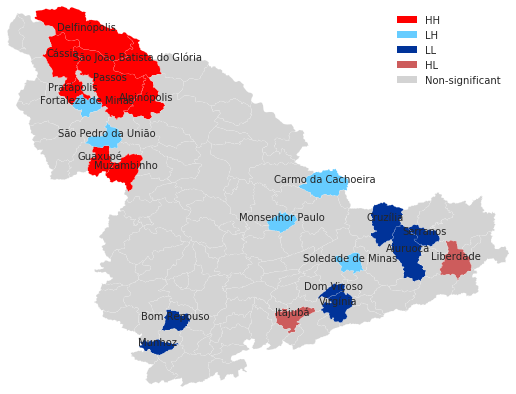

In [78]:
# plotar os nomes dos clusters e outliers espaciais 
fig = plt.figure(figsize=(9, 7))
shp = ps.open(shapefile)
base = maps.map_poly_shp(shp)
base = maps.base_lisa_cluster(base, lisa, p_thres=p_thres)
base.set_edgecolor('1')
base.set_linewidth(0.1)
ax = maps.setup_ax([base], [shp.bbox])

boxes, labels = maps.lisa_legend_components(lisa, p_thres=p_thres)
plt.legend(boxes, labels, fancybox=True)

for i in cidades_escolhidas.index:

    plt.text(cidades_escolhidas.geometry.centroid[i].coords[0][0], cidades_escolhidas.geometry.centroid[i].coords[0][1], 
             cidades_escolhidas.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

**Obter o mapa LISA e mostrar municípios *clusters* e *outliers* - variável PIB**

In [79]:
shapefile = 'ssm.shp'
w = ps.queen_from_shapefile(shapefile)
lisa = ps.Moran_Local(ssm.pib, w)
p_thres = 0.05

In [80]:
import numpy as np
lisa.p_sim  # pseudovalores do LISA
sig = lisa.p_sim < 0.05  # identificar significativos
lisa.p_sim[sig]
posicoes = np.where(sig)
ssm['quad'] = lisa.q
mun_sig = ssm.loc[posicoes[0], ['nome_mun', 'quad']]
# ou ssm.loc[posicoes[0], ['nome_mun', 'quad']].query('quad == 4')
cidades_escolhidas = ssm.iloc[mun_sig.index, :]

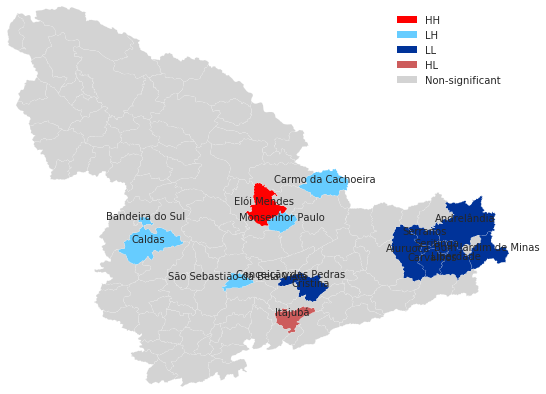

In [81]:
# plotar os nomes dos clusters e outliers espaciais 
fig = plt.figure(figsize=(9, 7))
shp = ps.open(shapefile)
base = maps.map_poly_shp(shp)
base = maps.base_lisa_cluster(base, lisa, p_thres=p_thres)
base.set_edgecolor('1')
base.set_linewidth(0.1)
ax = maps.setup_ax([base], [shp.bbox])

boxes, labels = maps.lisa_legend_components(lisa, p_thres=p_thres)
plt.legend(boxes, labels, fancybox=True)

for i in cidades_escolhidas.index:

    plt.text(cidades_escolhidas.geometry.centroid[i].coords[0][0], cidades_escolhidas.geometry.centroid[i].coords[0][1], 
             cidades_escolhidas.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

**renocup: mostrar apenas outliers espaciais**

In [82]:
shapefile = 'ssm.shp'
w = ps.queen_from_shapefile(shapefile)
lisa = ps.Moran_Local(ssm.renocup, w)
p_thres = 0.05

In [83]:
import numpy as np
lisa.p_sim  # pseudovalores do LISA
sig = lisa.p_sim < 0.05  # identificar significativos
lisa.p_sim[sig]
posicoes = np.where(sig)
ssm['quad'] = lisa.q
mun_sig = ssm.loc[posicoes[0], ['nome_mun', 'quad']].query('quad == 2 | quad == 4')
# ou ssm.loc[posicoes[0], ['nome_mun', 'quad']].query('quad == 4')
cidades_escolhidas = ssm.iloc[mun_sig.index, :]

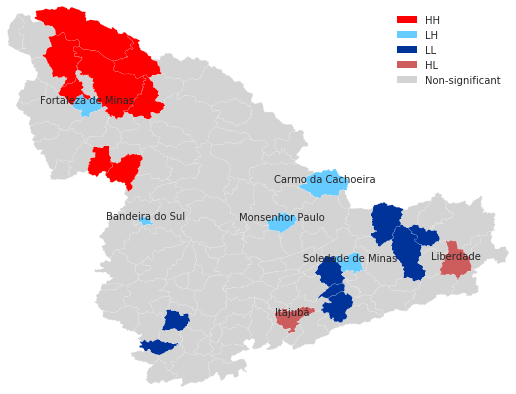

In [84]:
# plotar os nomes dos clusters e outliers espaciais 
fig = plt.figure(figsize=(9, 7))
shp = ps.open(shapefile)
base = maps.map_poly_shp(shp)
base = maps.base_lisa_cluster(base, lisa, p_thres=p_thres)
base.set_edgecolor('1')
base.set_linewidth(0.1)
ax = maps.setup_ax([base], [shp.bbox])

boxes, labels = maps.lisa_legend_components(lisa, p_thres=p_thres)
plt.legend(boxes, labels, fancybox=True)

for i in cidades_escolhidas.index:

    plt.text(cidades_escolhidas.geometry.centroid[i].coords[0][0], cidades_escolhidas.geometry.centroid[i].coords[0][1], 
             cidades_escolhidas.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

**Para MG**

- usando a variável 'popul', fazer a análise LISA e mostrar apenas os municípios que foram considerados *clusters* e *outliers* espaciais

In [94]:
mg = nupis.mesclar_shp_df('31MUE250GC_SIR.shp', 'atlas.csv')

In [95]:
shapefile = '31MUE250GC_SIR.shp'
w = ps.queen_from_shapefile(shapefile)
lisa = ps.Moran_Local(mg.popul, w)
p_thres = 0.05

In [96]:
# clusters e outliers espaciais
import numpy as np
lisa.p_sim  # pseudovalores do LISA
sig = lisa.p_sim < 0.05  # identificar significativos
lisa.p_sim[sig]
posicoes = np.where(sig)
mg['quad'] = lisa.q
mun_sig = mg.loc[posicoes[0], ['nome_mun', 'quad']]
mun_sig

,nome_mun,quad
6,Água Comprida,2
22,Alto Rio Doce,3
29,Andrelândia,3
37,Araguari,1
64,Belmiro Braga,2
65,Belo Horizonte,1
69,Bertópolis,3
71,Betim,1
72,Bias Fortes,2
73,Bicas,2


In [97]:
# municípios significativos
cidades_escolhidas = mg.iloc[mun_sig.index, :]
cidades_escolhidas

,NM_MUNICIP,mun,geometry,nome_mun,nome_uf,uf,rm,meso,nome_meso,micro,...,porte,vab_agro,vab_ind,vab_serv,vab_adm,vab_total,impostos,pib,pibpc,quad
6,ÁGUA COMPRIDA,3100708,POLYGON ((-47.98116005400004 -20.0364314116079...,Água Comprida,Minas Gerais,31,nao,3105,Triângulo Mineiro/Alto Paranaíba,31022,...,pequenoI,43434.608,4.419148e+03,1.884315e+04,9548.361,7.624526e+04,3104.308,7.934957e+04,39281.97,2
22,ALTO RIO DOCE,3102100,POLYGON ((-43.47048499999999 -20.9395049966304...,Alto Rio Doce,Minas Gerais,31,nao,3112,Zona da Mata,31062,...,pequenoI,28524.445,4.382216e+03,1.862057e+04,25573.767,7.710100e+04,2207.308,7.930831e+04,6523.14,3
29,ANDRELÂNDIA,3102803,POLYGON ((-44.16355900000003 -21.5893919966461...,Andrelândia,Minas Gerais,31,nao,3110,Sul/Sudoeste de Minas,31055,...,pequenoI,15014.099,8.905838e+03,4.007207e+04,26332.339,9.032435e+04,7061.936,9.738629e+04,8017.97,3
37,ARAGUARI,3103504,POLYGON ((-48.34163695400002 -18.3697063945649...,Araguari,Minas Gerais,31,nao,3105,Triângulo Mineiro/Alto Paranaíba,31018,...,medioII,161648.492,8.215804e+05,7.445728e+05,244371.873,1.972174e+06,175615.054,2.147789e+06,19564.66,1
64,BELMIRO BRAGA,3106101,"POLYGON ((-43.37457 -21.89595999565354, -43.37...",Belmiro Braga,Minas Gerais,31,nao,3112,Zona da Mata,31065,...,pequenoI,5050.731,4.501149e+03,7.168417e+03,9649.701,2.637000e+04,3761.043,3.013104e+04,8851.66,2
65,BELO HORIZONTE,3106200,POLYGON ((-43.94607618500001 -19.7772410846014...,Belo Horizonte,Minas Gerais,31,RM Belo Horizonte,3107,Metropolitana de Belo Horizonte,31030,...,grandeII,833.082,1.043826e+07,3.342716e+07,6068672.879,4.993492e+07,9268152.152,5.920307e+07,24922.95,1
69,BERTÓPOLIS,3106606,POLYGON ((-40.46635200000004 -16.8371219975236...,Bertópolis,Minas Gerais,31,nao,3104,Vale do Mucuri,31016,...,pequenoI,3934.179,2.482529e+03,5.243210e+03,11905.871,2.356579e+04,803.911,2.436970e+04,5417.90,3
71,BETIM,3106705,POLYGON ((-44.16203548200001 -19.8422063246030...,Betim,Minas Gerais,31,RM Belo Horizonte,3107,Metropolitana de Belo Horizonte,31030,...,medioII,10122.979,9.570228e+06,6.767701e+06,1191177.834,1.753923e+07,5845683.778,2.338491e+07,61939.08,1
72,BIAS FORTES,3106804,POLYGON ((-43.70609699999999 -21.5852889966460...,Bias Fortes,Minas Gerais,31,nao,3112,Zona da Mata,31065,...,pequenoI,3407.888,1.195619e+03,5.291320e+03,10187.865,2.008269e+04,739.521,2.082221e+04,5485.30,2
73,BICAS,3106903,POLYGON ((-43.02910899999996 -21.6757369966483...,Bicas,Minas Gerais,31,nao,3112,Zona da Mata,31065,...,pequenoI,2882.507,1.465146e+04,6.365526e+04,30269.956,1.114592e+05,9100.714,1.205599e+05,8830.29,2


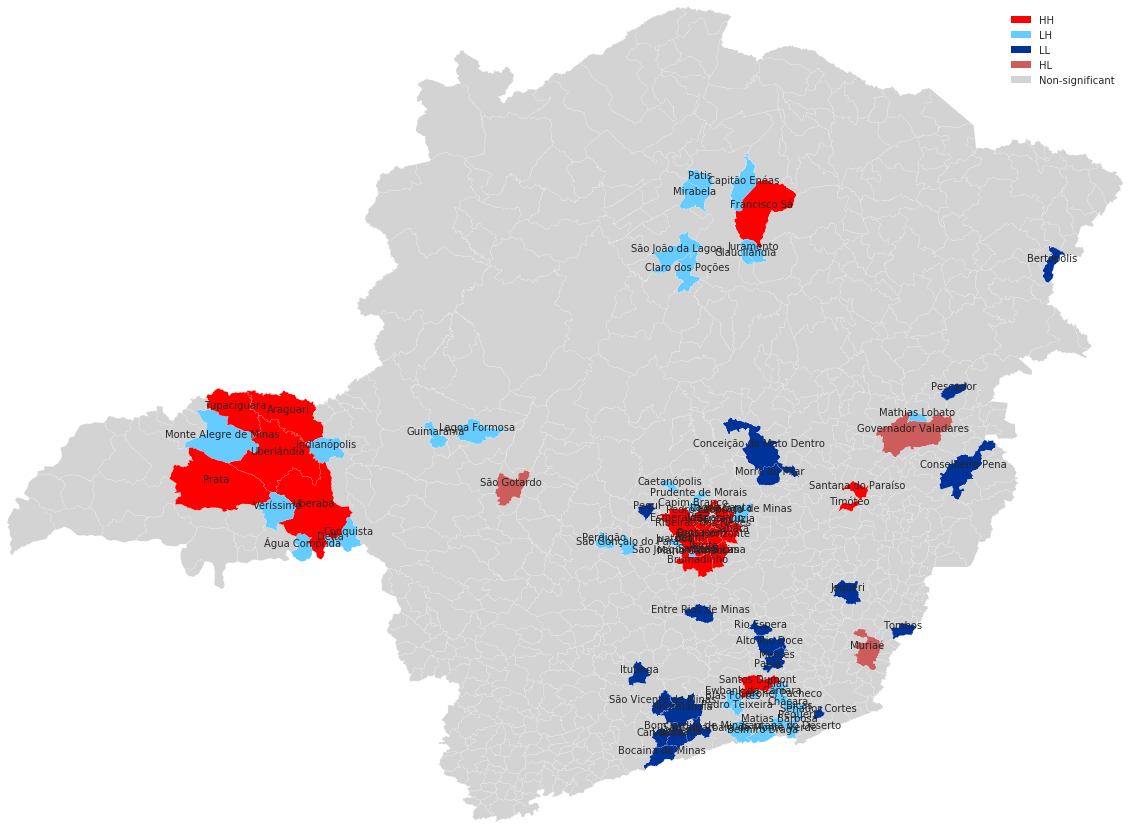

In [98]:
# plotar os nomes dos clusters e outliers espaciais 
fig = plt.figure(figsize=(20, 15))
shp = ps.open(shapefile)
base = maps.map_poly_shp(shp)
base = maps.base_lisa_cluster(base, lisa, p_thres=p_thres)
base.set_edgecolor('1')
base.set_linewidth(0.1)
ax = maps.setup_ax([base], [shp.bbox])

boxes, labels = maps.lisa_legend_components(lisa, p_thres=p_thres)
plt.legend(boxes, labels, fancybox=True)

for i in cidades_escolhidas.index:

    plt.text(cidades_escolhidas.geometry.centroid[i].coords[0][0], cidades_escolhidas.geometry.centroid[i].coords[0][1], 
             cidades_escolhidas.nome_mun[i],
             fontsize=10, horizontalalignment='center', verticalalignment='bottom')

Tentar plotar os nomes dos municípios que são *outliers* espaciais.